In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from '/home/ciwan/projects/msc_students/sheilafarrahi/thesis/classification_modules.py'>

In [7]:
sample_size = 100
nr_sample = 20
nr_moments = 5

### Bounded distributions

In [8]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_dists, sample_size, nr_sample)

In [9]:
moments_df = dem.get_moments_df(bounded_samples, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,arcsine
3,0.471492,0.128040,0.000715,0.024022,0.000901,arcsine
4,0.541186,0.126426,-0.008496,0.023988,-0.003463,arcsine


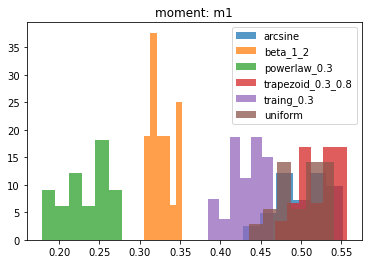

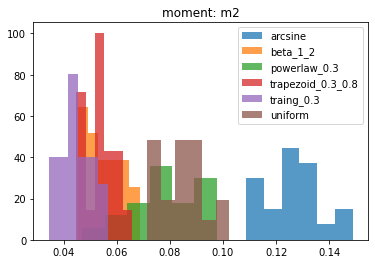

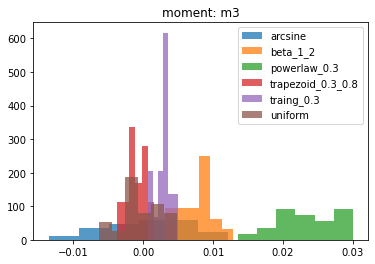

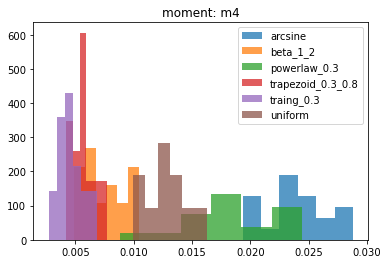

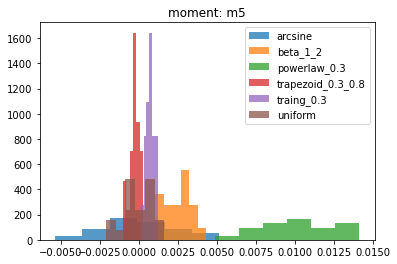

In [10]:
dem.get_histogram_of_moments(moments_df)

In [11]:
test_size = 0.2
cv = 5

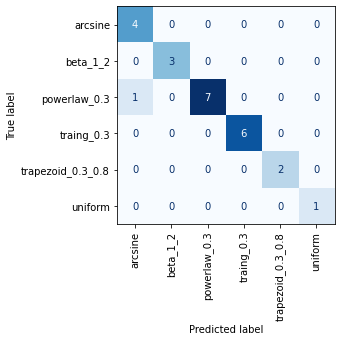

array([1., 1., 1., 1., 1.])

In [12]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [16]:
# testing number of smaples vs accuracy
acc_mean = []
acc_std = []
nr_sample_list = list(range(10,100, 5))

for num_samples_ in nr_sample_list:
    print("Num_samples: " + str(num_samples_))
    bounded_samples = dm.get_samples(bounded_dists, num_samples_, sample_size)
    moments_df = dem.get_moments_df(bounded_samples, nr_moments)
    score = cm.svm_model(moments_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

Num_samples: 10
Num_samples: 15
Num_samples: 20
Num_samples: 25
Num_samples: 30
Num_samples: 35
Num_samples: 40
Num_samples: 45
Num_samples: 50
Num_samples: 55
Num_samples: 60
Num_samples: 65
Num_samples: 70
Num_samples: 75
Num_samples: 80
Num_samples: 85
Num_samples: 90
Num_samples: 95


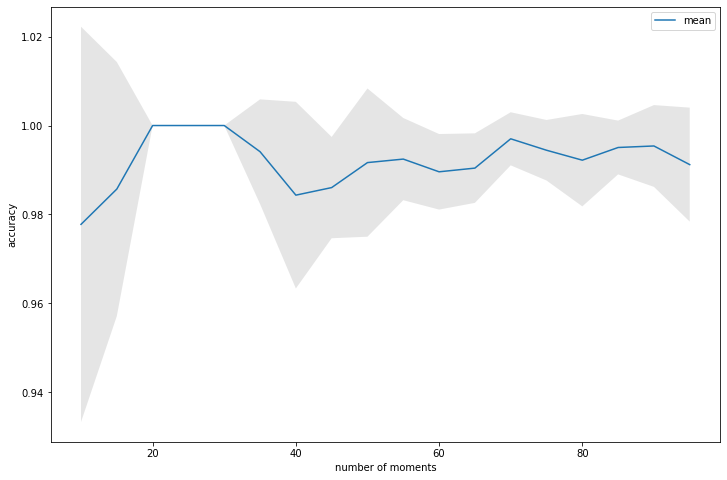

In [17]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(nr_sample_list,acc_mean, label='mean')

plt.gca().fill_between(nr_sample_list,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.legend()

In [20]:
# testing number of moments vs accuracy
acc_mean = []
acc_std = []
nr_moments_list = list(range(2,20, 2))

for k_moments in nr_moments_list:
    print("Num_moments: " + str(k_moments))
    bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
    moments_df = dem.get_moments_df(bounded_samples, k_moments)
    score = cm.svm_model(moments_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

Num_moments: 2
Num_moments: 4
Num_moments: 6
Num_moments: 8
Num_moments: 10
Num_moments: 12
Num_moments: 14
Num_moments: 16
Num_moments: 18


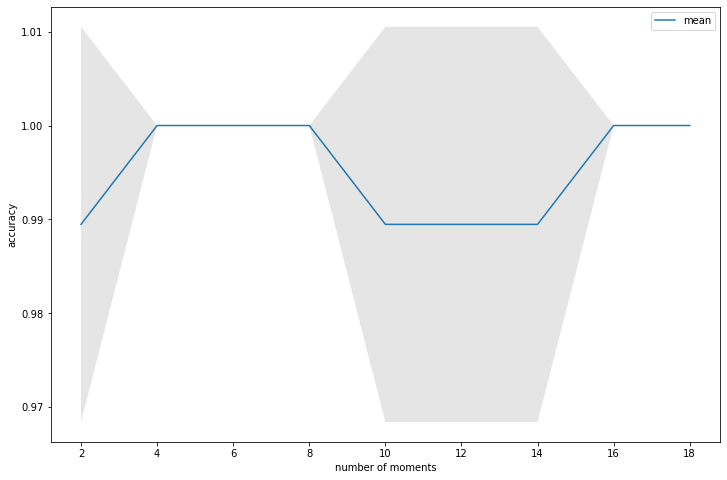

In [21]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(nr_moments_list,acc_mean, label='mean')

plt.gca().fill_between(nr_moments_list,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.legend()

### Longtail distributions

In [27]:
longtail_dists = dm.get_longtail_distribution()
#dm.plot_histograms_of_samples(longtail_dists, sample_size, nr_sample)

In [28]:
longtail_samples = dm.get_samples(longtail_dists, nr_sample, sample_size)
transformed_sampels = dict()
for name, samples in longtail_samples.items():
    transformed_sampels[name] = np.log1p(samples)
moments_df = dem.get_moments_df(transformed_sampels, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,dist
0,0.856877,0.552635,0.748622,2.125040,5.403208,cauchy
1,0.751252,0.339962,0.267032,0.698255,1.472459,cauchy
2,0.961129,0.651867,0.673340,1.947710,4.503151,cauchy
3,0.848664,0.650846,1.137941,4.057456,13.942702,cauchy
4,0.966389,0.571285,0.499312,1.356046,2.577080,cauchy


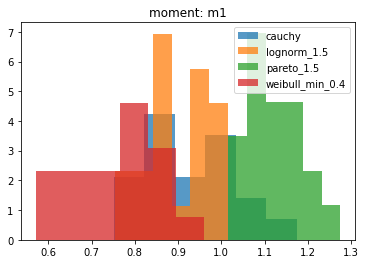

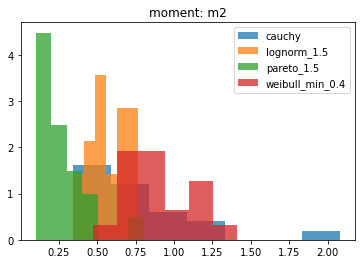

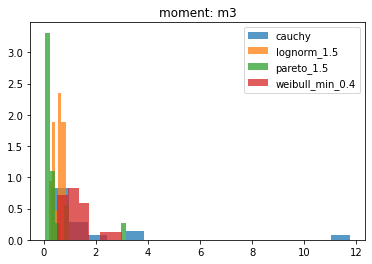

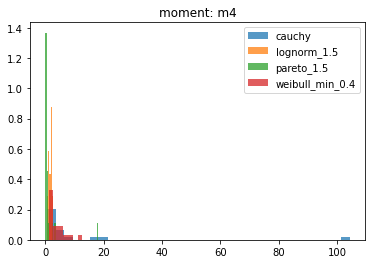

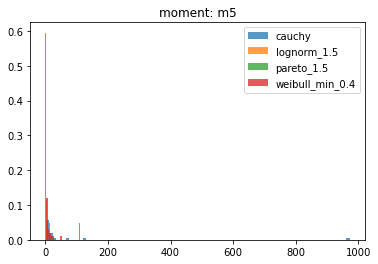

In [30]:
dem.get_histogram_of_moments(moments_df)

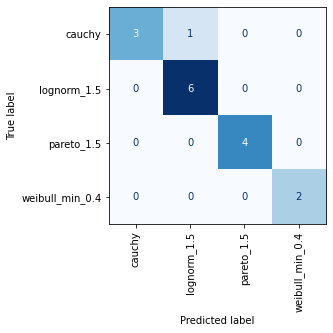

array([0.69230769, 0.76923077, 0.92307692, 0.92307692, 0.83333333])

In [31]:
cm.svm_model(moments_df, test_size, cv, plot=1)